In [ ]:
import pandas as pd

df = pd.read_csv("/content/NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [ ]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values
y_train = train['Close'].values
y_test = test['Close'].values

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(objective ='reg:squarederror')
model_xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
print("Mean Squared Error - ", round(mean_squared_error(y_test, y_pred), 3))
print("Root Mean Squared Error - ", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print("Mean Absolute Error - ", round(mean_absolute_error(y_test, y_pred), 3))

Mean Squared Error -  30.235
Root Mean Squared Error -  5.499
Mean Absolute Error -  4.008


In [68]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R-squared:", round(r2 * 100, 2), "%")

R-squared: 99.76 %


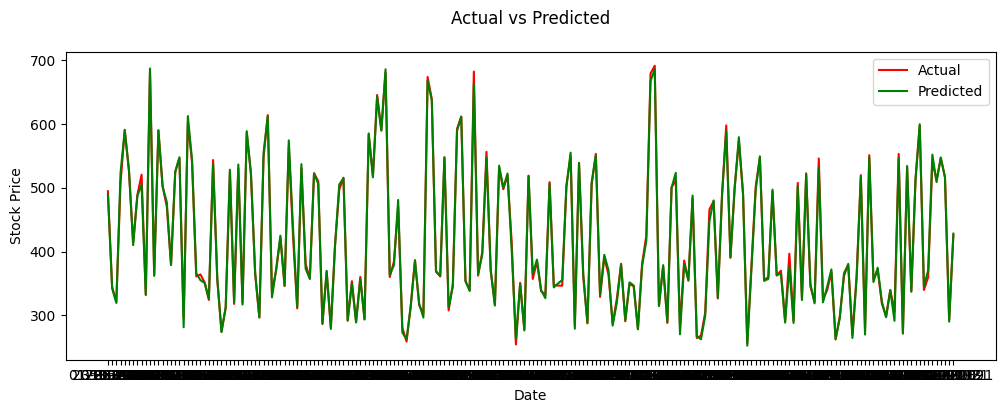

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(test['Date'], y_test, label='Actual', color='red')
plt.plot(test['Date'], y_pred, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted', color='black', pad=20)
plt.legend()
plt.show()


In [71]:
import numpy as np
from sklearn.preprocessing import StandardScaler

user_open = float(input("Enter the Open price: "))
user_high = float(input("Enter the High price: "))
user_low = float(input("Enter the Low price: "))
user_volume = float(input("Enter the Volume: "))


user_input_array = np.array([[user_open, user_high, user_low, user_volume]])


scaler = StandardScaler()
scaler.fit(x_train)
user_input_scaled = scaler.transform(user_input_array)


user_prediction = model_xgb.predict(user_input_scaled)
print()
print("Predicted Stock Price:", user_prediction[0])


Enter the Open price: 262
Enter the High price: 267
Enter the Low price: 250
Enter the Volume: 254

Predicted Stock Price: 249.27905
